# Convolutional Neural Networks

**Convolutional Neural Networks (CNNs)** are a class of deep neural networks specifically designed for processing structured grid-like data. They are designed to process visual data like images and videos, but they can also be used in sequential data applications. 

They are especially good at recognizing patterns, detecting objects, and classifying images. Instead of treating an image as a simple set of numbers (pixels), CNNs automatically learn spatial features — meaning they understand shapes, edges, and textures—without needing manual feature selection.

CNNs leverage shared weights (kernels) and local connectivity, reducing the number of parameters compared to fully connected networks and enabling them to learn translation-invariant features.

If you think of how humans recognize objects, we don’t analyze every single pixel one by one. Instead, we look at **features** like edges, corners, and textures, and combine them to form a bigger picture. CNNs work in a similar way, breaking down an image into smaller parts and gradually learning what matters for a specific task.

![](https://svitla.com/wp-content/uploads/2024/06/CNN-network-model-1024x458.jpeg)

## Convolutional Layer

The **convolutional layer** is the foundation of a CNN. It applies filters (also called **kernels**) to the input image to detect important features, such as edges, textures, and patterns.

### How Convolution Works
- A **filter (kernel)** is a small matrix (e.g., 3×3 or 5×5) that slides over the image.
- At each position, the filter performs an **element-wise multiplication** with the corresponding region of the image. (Essentially, the dot product.)
- The results are summed up to produce a **single value** in the output **feature map**.
- The filter moves across the entire image, creating a new representation of the image that highlights certain patterns.

### Mathematical Formulation
Given an input image $ X $ and a filter $ W $, the convolution operation is:

$$
Y(i,j) = \sum_m \sum_n X(i+m, j+n) W(m,n) + b
$$

where:
- $ Y(i,j) $ is the output feature map.
- $ W(m,n) $ is the convolution kernel (filter).
- $ b $ is the bias term.

### Why Convolution Works
- Filters automatically learn to detect features during training.
- Multiple filters are used to extract different features from the same image.
- The convolution operation reduces the number of parameters compared to a fully connected layer, making CNNs more efficient for high-dimensional data.

![](https://miro.medium.com/v2/resize:fit:2000/1*8dx6nxpUh2JqvYWPadTwMQ.gif)

### Examples
#### TensorFlow/Keras

In [20]:
import tensorflow as tf
from keras.layers import Conv2D
import numpy as np

# Create a dummy image (1 sample, 28x28 pixels, 1 channel)
image = np.random.rand(1, 28, 28, 1).astype(np.float32)

# Apply a convolutional layer with 32 filters and a 3x3 kernel
conv_layer = Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='valid', activation=None)

# Apply the layer to the image
output = conv_layer(image)
print("Output Shape (TensorFlow):", output.shape)

Output Shape (TensorFlow): (1, 26, 26, 32)


#### PyTorch

In [ ]:
import torch
import torch.nn as nn

# Create a dummy image (1 sample, 1 channel, 28x28 pixels)
image = torch.rand(1, 1, 28, 28)

# Define a convolutional layer with 32 filters and a 3x3 kernel
conv_layer = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)

# Apply the layer to the image
output = conv_layer(image)
print("Output Shape (PyTorch):", output.shape)

## Stride And Padding

Two important parameters that affect how convolution is performed are **stride** and **padding**. These parameters impact the size of the output feature map and how much information is retained from the input.

![](https://miro.medium.com/v2/resize:fit:1400/1*O06nY1U7zoP4vE5AZEnxKA.gif)

### Stride

The stride defines how much the filter moves across the image in each step during convolution.
- A smaller stride (e.g., 1) means the filter moves pixel by pixel, capturing fine-grained details.
- A larger stride (e.g., 2 or more) skips pixels, making the output smaller but reducing computational cost.


### Padding

Padding is the process of adding extra pixels (usually zeros) around the edges of the input image before applying convolution. This controls how much of the image is preserved in the output.

There are two common types of padding used in CNNs:

#### Valid Padding ("No Padding")
- No extra pixels are added.
- The output feature map is smaller than the input.
- Ensures that no redundant pixels are included in calculations.
- Formula for output size:

$$
\frac{(N - F)}{S} + 1
$$

where:
- $ N $ = input size
- $ F $ = filter size
- $ S $ = stride

#### Same Padding ("Zero Padding")
- Extra zeros are added so that the output has the same spatial dimensions as the input.
- Ensures that edge information is **not lost**.
- Used when we want to keep the feature map size unchanged.
- Formula for output size:

$$
\frac{N}{S}
$$


## Activation Function

After the convolution operation, CNNs apply an **activation function** to introduce non-linearity. Without this step, the CNN would behave like a simple linear model, limiting its ability to capture complex patterns. With this step, the activation function acts as a filter that keeps only useful information and discards irrelevant (negative) values. 

### ReLU (Rectified Linear Unit)
The most commonly used activation function in CNNs is **ReLU**, which is defined as:

$$
f(x) = \max(0, x)
$$

### Why ReLU?
- It **removes negative values**, ensuring only relevant features are passed forward.
- It helps with the **vanishing gradient problem**, where gradients become too small in deep networks, slowing learning.
- It makes training faster and improves convergence.


### Examples
#### TensorFlow/Keras

In [7]:
from keras.layers import Activation

# Apply ReLU activation
relu_layer = Activation('relu')
relu_output = relu_layer(output)
print("After ReLU Activation (TensorFlow):", relu_output.shape)

After ReLU Activation (TensorFlow): (1, 28, 28, 32)


#### PyTorch

In [ ]:
# Apply ReLU activation
relu_layer = nn.ReLU()
relu_output = relu_layer(output)
print("After ReLU Activation (PyTorch):", relu_output.shape)

## Pooling Layer

Pooling layers work to **reduce the size of feature maps** while retaining important information. This makes the network more computationally efficient and less sensitive to small variations or distortions in the image. Pooling is like taking a summary — max pooling picks the **most prominent** feature, while average pooling gives an **overall impression**.

### Types of Pooling
1. **Max Pooling**: Takes the **maximum** value from each pooling window, esentially keeping the most dominant feature in each region.
   - Example: From a 2×2 window **[1, 3, 5, 2]**, max pooling keeps **5**.
  
2. **Average Pooling**: Computes the **average** of values in each pooling window, and essentially keeps more of the overall information.
   - Example: From **[1, 3, 5, 2]**, average pooling keeps **(1+3+5+2)/4 = 2.75**.

![](https://miro.medium.com/v2/resize:fit:2000/format:webp/1*CYB2dyR3EhFs1xNLK8ewiA.gif)

### Examples
#### TensorFlow/Keras

In [8]:
from keras.layers import MaxPooling2D

# Apply Max Pooling (2x2)
pooling_layer = MaxPooling2D(pool_size=(2,2), strides=2, padding='valid')
pooled_output = pooling_layer(relu_output)
print("After Max Pooling (TensorFlow):", pooled_output.shape)

After Max Pooling (TensorFlow): (1, 14, 14, 32)


#### PyTorch

In [ ]:
# Apply Max Pooling (2x2)
pooling_layer = nn.MaxPool2d(kernel_size=2, stride=2)
pooled_output = pooling_layer(relu_output)
print("After Max Pooling (PyTorch):", pooled_output.shape)

## Fully Connected Layer

After convolutional and pooling layers have extracted features, the **fully connected layer** translates them into a final prediction.

### How It Works
- The output feature maps from previous layers are **flattened** into a 1D vector.
- This vector is passed through one or more **fully connected layers**, where each neuron is connected to every neuron in the previous layer.
- These layers learn to associate extracted features with specific **labels or categories**.

### Mathematical Representation
A fully connected layer applies:

$$
y = W x + b
$$

where:
- $ W $ represents the learned **weights**,
- $ x $ is the **input feature vector**,
- $ b $ is the **bias term**.

### Examples
#### TensorFlow/Keras

In [9]:
from keras.layers import Flatten, Dense

# Flatten the pooled output and pass it through a dense layer
flatten_layer = Flatten()
flattened_output = flatten_layer(pooled_output)

dense_layer = Dense(128, activation='relu')
dense_output = dense_layer(flattened_output)
print("After Fully Connected Layer (TensorFlow):", dense_output.shape)

After Fully Connected Layer (TensorFlow): (1, 128)


#### PyTorch

In [ ]:
# Flatten the pooled output and pass it through a dense layer
flatten_layer = nn.Flatten()
flattened_output = flatten_layer(pooled_output)

dense_layer = nn.Linear(in_features=flattened_output.shape[1], out_features=128)
dense_output = dense_layer(flattened_output)
print("After Fully Connected Layer (PyTorch):", dense_output.shape)

## Softmax Layer

The final layer in a CNN (for classification tasks) is typically the **Softmax layer**. This layer converts raw output scores (logits) into **probabilities** for each class.

### Softmax Formula
$$
\sigma(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}}
$$

where:
- $ z_i $ is the score for class $ i $.
- The denominator sums up the exponentiated scores across all classes.

### Why Use Softmax?
- It ensures the outputs sum to **1**, making them interpretable as probabilities.
- The class with the **highest probability** is selected as the CNN's final prediction.

### Examples
#### TensorFlow/Keras

In [10]:
from keras.layers import Softmax

# Apply softmax activation for classification
softmax_layer = Softmax()
final_output = softmax_layer(dense_output)
print("After Softmax (TensorFlow):", final_output.shape)

After Softmax (TensorFlow): (1, 128)


#### PyTorch

In [ ]:
# Apply softmax activation for classification
softmax_layer = nn.Softmax(dim=1)
final_output = softmax_layer(dense_output)
print("After Softmax (PyTorch):", final_output.shape)

## Complete CNN Examples

#### TensorFlow/ Keras

In [11]:
from tensorflow.keras.models import Sequential

model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Output layer with 10 classes
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               802944    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
__________________________________________________

#### PyTorch

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2,2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * 14 * 14, 128)  # Adjusted for image size
        self.fc2 = nn.Linear(128, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Create model and print architecture
model = SimpleCNN()
print(model)

## Real World CNN Example

### Prepare The Data Inputs

In [ ]:
!pip install seaborn

In [3]:
# Import necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from keras import datasets, layers, models
from sklearn.metrics import confusion_matrix, classification_report

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize the images to [0, 1] range for better training stability
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape the images to add a channel dimension (28x28 grayscale images → 28x28x1)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Define the class labels for reference
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

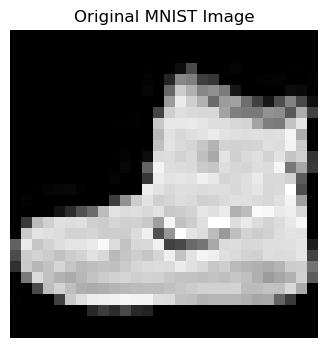

In [13]:
# Select a single image
image = train_images[0]  # First image in the dataset

# Display the original image
plt.figure(figsize=(4,4))
plt.imshow(image, cmap='gray')
plt.title("Original MNIST Image")
plt.axis('off')
plt.show()

### Build The CNN Model

In [14]:
# Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(128, (3,3), activation='relu'),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Evaluate model performance
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("\nTest accuracy:", test_acc)

Epoch 1/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.4604 - accuracy: 0.8314 - val_loss: 0.3939 - val_accuracy: 0.8524
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3034 - accuracy: 0.8885 - val_loss: 0.2968 - val_accuracy: 0.8926
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2558 - accuracy: 0.9058 - val_loss: 0.2696 - val_accuracy: 0.9026
Epoch 4/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2265 - accuracy: 0.9157 - val_loss: 0.2537 - val_accuracy: 0.9073
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1995 - accuracy: 0.9256 - val_loss: 0.2549 - val_accuracy: 0.9114
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1771 - accuracy: 0.9336 - val_loss: 0.2831 - val_accuracy: 0.9022
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1567 - accuracy: 0.9413 - val_loss: 0.2624 -

### Evaluate Accuracy And Loss

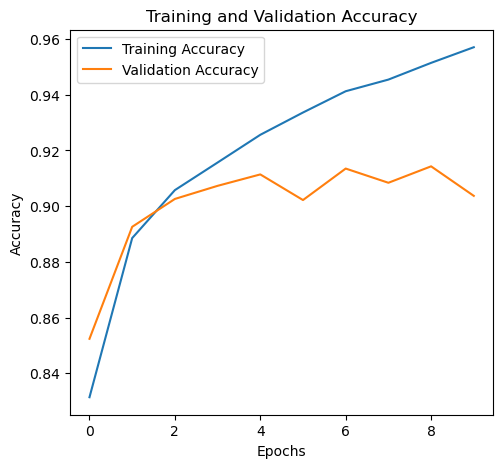

In [16]:
# Plot training accuracy and validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

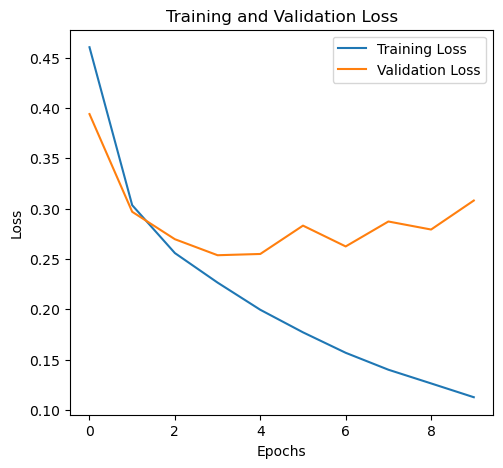

In [17]:
# Plot training loss and validation loss
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

### Evaluate Confusion Matrix

313/313 [==============================] - 1s 4ms/step


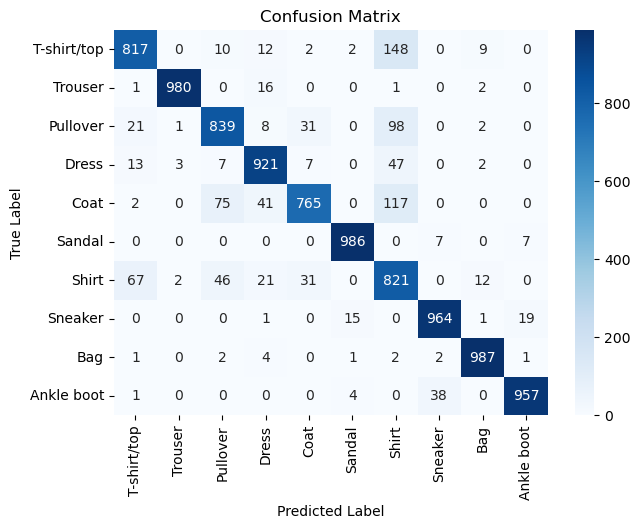

In [18]:
# Get model predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# Display classification report
print("\nClassification Report:\n", classification_report(test_labels, predicted_labels, target_names=class_names))


Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.89      0.82      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.86      0.84      0.85      1000
       Dress       0.90      0.92      0.91      1000
        Coat       0.92      0.77      0.83      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.67      0.82      0.74      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.97      0.99      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



## Noising Filter

A **noising filter** is a tool used in image processing and deep learning that alters pixel values in a controlled way (typically by smoothing, blurring, or adding noise) to affect how information is represented in an image. Instead of letting a model focus on the exact value of every individual pixel, a noising filter encourages the model to consider local regions as a whole.

This approach can help:
- **Reduce overfitting:** By obscuring specific pixel-level details, the model learns more robust, general patterns rather than memorizing noise or irrelevant details in the training images.
- **Feature extraction:** Noising filters can help emphasize essential structures like edges and shapes, while de-emphasizing background textures or minor variations.
- **Robustness:** Adding controlled noise or smoothing compels the model to generalize, making it less sensitive to minor input variations and improving performance on new, unseen data.

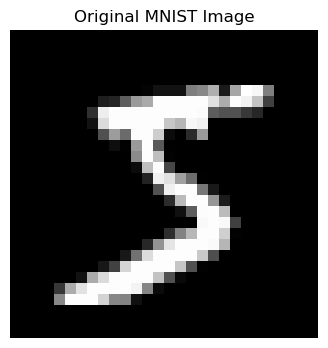

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Select a single image
image = train_images[0]  # First image in the dataset

# Display the original image
plt.figure(figsize=(4,4))
plt.imshow(image, cmap='gray')
plt.title("Original MNIST Image")
plt.axis('off')
plt.show()

### Convolution Noising Filter

A **convolution-based noising filter** works by applying a small matrix, known as a kernel, to local regions of an image. As this kernel moves across the image, it combines the values of neighboring pixels according to a mathematical rule, typically an average or a weighted sum. This operation blends pixel values together, which can create a blurring effect that softens fine details and helps suppress random noise. 

- **Blurring:** For example, a simple averaging kernel replaces each pixel’s value with the mean of its neighbors, producing a blur.
- **Denoising:** This same approach can smooth out random noise by making the pixel values in a neighborhood more similar to each other.
- **Generalization:** By forcing the model to “see” smoothed patterns instead of crisp pixel-by-pixel detail, convolutional filters help the model learn larger, more meaningful features.

#### Example

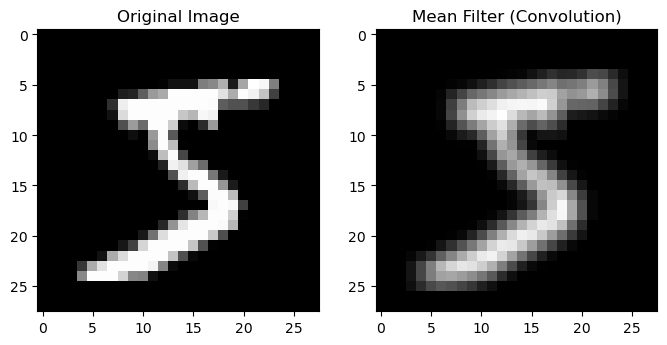

In [19]:
from scipy.ndimage import convolve

# Define a 3x3 mean filter kernel
mean_kernel = np.ones((3,3)) / 9

# Apply convolution filter
mean_filtered_image = convolve(image, mean_kernel, mode='constant', cval=0.0)

# Display results
plt.figure(figsize=(8,4))
plt.subplot(1,2,1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
plt.subplot(1,2,2), plt.imshow(mean_filtered_image, cmap='gray'), plt.title("Mean Filter (Convolution)")
plt.show()

### Gaussian Noising Filter

The **Gaussian filter** is a specific type of convolutional filter where the kernel weights are distributed according to a Gaussian (bell-shaped) curve. **In this filter, pixels closer to the center of the kernel have a greater impact on the output than those farther away.** In other words, pixels near the center of the kernel have the most influence, while those further away contribute less. This approach creates a smooth, natural-looking blur that reduces noise while still maintaining edge information better than a simple averaging filter. Gaussian filters are widely used for tasks where it is important to reduce unwanted noise or variation without losing the critical structural features of an image.

#### Example

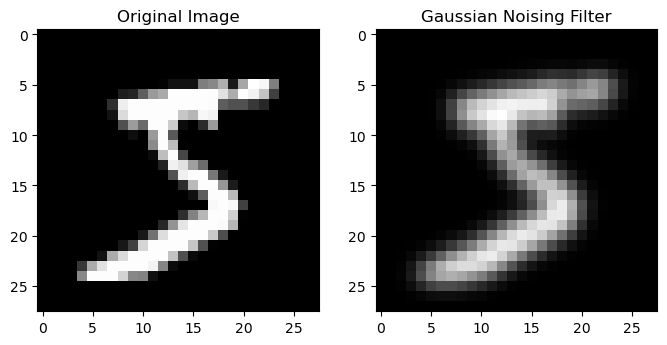

In [20]:
from scipy.ndimage import gaussian_filter

# Apply Gaussian blur with a standard deviation of 1
gaussian_blurred_image = gaussian_filter(image, sigma=1)

# Display results
plt.figure(figsize=(8,4))
plt.subplot(1,2,1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
plt.subplot(1,2,2), plt.imshow(gaussian_blurred_image, cmap='gray'), plt.title("Gaussian Noising Filter")
plt.show()

### Vertical Edges Filter

Edge detection filters are designed to identify boundaries within images. A **vertical edges filter** specifically detects sharp changes in pixel intensity along the vertical direction, making vertical lines and boundaries stand out. By highlighting vertical edges while suppressing horizontal ones, this filter is especially useful in applications like detecting building outlines, text, or any features that are vertically oriented within an image. **A vertical edge filter highlights vertical edges while suppressing horizontal structures.**

#### Example

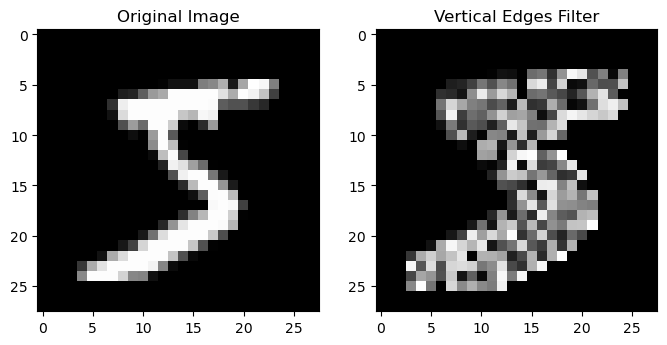

In [21]:
from scipy.ndimage import sobel

# Apply vertical edge detection
vertical_edges = sobel(image, axis=1)

# Display results
plt.figure(figsize=(8,4))
plt.subplot(1,2,1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
plt.subplot(1,2,2), plt.imshow(vertical_edges, cmap='gray'), plt.title("Vertical Edges Filter")
plt.show()

### Horizontal Edge Filter

A **horizontal edge filter** is tuned to detect intensity changes along the horizontal direction. This filter emphasizes horizontal lines or boundaries, such as the separation between layers in a landscape or the top and bottom of objects. Vertical details are largely suppressed, allowing the filter to isolate and enhance horizontal patterns for further analysis or feature extraction. **A horizontal edge filter detects horizontal transitions in pixel values, while suppressing vertical structures.**

#### Example

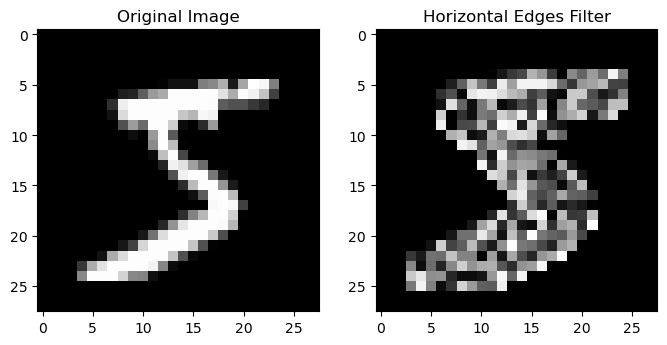

In [22]:
# Apply horizontal edge detection
horizontal_edges = sobel(image, axis=0)

# Display results
plt.figure(figsize=(8,4))
plt.subplot(1,2,1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
plt.subplot(1,2,2), plt.imshow(horizontal_edges, cmap='gray'), plt.title("Horizontal Edges Filter")
plt.show()

## CNN Architectures

Over the years, several **Convolutional Neural Network (CNN) architectures** have been developed, significantly improving the efficiency and accuracy of deep learning models for image classification. These architectures have introduced innovations in convolutional layers, activation functions, and network depth, allowing CNNs to handle increasingly complex tasks. 

### LeNet-5 (1998)

**LeNet-5** was one of the earliest CNN architectures. It was developed by Yann LeCun in 1998 for handwritten digit recognition. It consists of two convolutional layers followed by subsampling (pooling) layers, fully connected layers, and a softmax classifier. The architecture was designed to recognize handwritten digits from the MNIST dataset, making it an excellent starting point for understanding CNNs.

**Note:** LeNet-5 uses tanh activation instead of ReLU, as ReLU was not commonly used at the time. The model's average pooling layers reduce feature map size while retaining essential information.

![](https://miro.medium.com/v2/resize:fit:2000/format:webp/1*1TI1aGBZ4dybR6__DI9dzA.png)

In [24]:
import tensorflow as tf
from keras import datasets, layers, models

# Load and preprocess MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Define LeNet-5 model
model = models.Sequential([
    layers.Conv2D(6, (5,5), activation='tanh', input_shape=(28,28,1)),
    layers.AveragePooling2D((2,2)),
    layers.Conv2D(16, (5,5), activation='tanh'),
    layers.AveragePooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(120, activation='tanh'),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax') # Output layer for 10 classes
])

# Compile and summarize model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/Users/jonathanschlosser/anaconda3/envs/OldJupyter/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

### AlexNet (2012)

**AlexNet**, developed by Alex Krizhevsky, was the first deep CNN to win the ImageNet competition, significantly outperforming previous methods. It introduced the ReLU activation function, which sped up training, and used dropout to prevent overfitting. It was also notable for using overlapping max pooling and multiple GPUs to train deeper networks.

![](https://neurohive.io/wp-content/uploads/2018/10/AlexNet-1.png)

In [29]:
import tensorflow as tf
from keras import datasets, layers, models

# Load and preprocess MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Define a simplified AlexNet for MNIST
model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),  
    layers.MaxPooling2D((2,2)),  

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),  
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile and summarize model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,797,834 (25.93 MB)

 Trainable params: 6,797,834 (25.93 MB)

 Non-trainable params: 0 (0.00 B)

### VGG-16 and VGG-19 (2014)

The VGG architectures, developed by the Visual Geometry Group at Oxford, introduced the idea of using small $ 3×3 $ filters with deep networks. The small filter size allowed the network to capture fine details while reducing the number of parameters compared to larger filters. VGG-16 and VGG-19 are deeper networks with 16 and 19 weight layers, respectively. VGG models rely on stacked small convolutional filters followed by max pooling, allowing deeper feature extraction while controlling model complexity.

![](https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png)

In [26]:
# Define a simplified VGG-16 model for MNIST
model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile and summarize model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,867,466 (7.12 MB)

 Trainable params: 1,867,466 (7.12 MB)

 Non-trainable params: 0 (0.00 B)

### ResNet (2015)

**ResNet**, or Residual Networks, introduced skip connections (residual connections) to address the vanishing gradient problem in deep networks. These connections allow gradients to flow directly through the network, making it easier to train very deep models. By implementing residual connections, the model can learn identity mappings, preventing degradation in accuracy as the depth increases.

![](https://towardsdatascience.com/wp-content/uploads/2022/08/0tH9evuOFqk8F41FG.png)

In [32]:
import tensorflow as tf
from keras.layers import Add, Conv2D, Input, Flatten, Dense, MaxPooling2D, ReLU, BatchNormalization
from keras.models import Model

# Residual block function with identity mapping fix
def residual_block(x, filters, downsample=False):
    res = Conv2D(filters, (3,3), padding='same', activation='relu')(x)
    res = Conv2D(filters, (3,3), padding='same')(res)
    
    # Adjust dimensions using a 1x1 convolution if downsampling or filter size changes
    if downsample or x.shape[-1] != filters:
        x = Conv2D(filters, (1,1), padding='same')(x)

    res = Add()([x, res])  # Skip connection
    return ReLU()(res)

# Define ResNet-like model for MNIST
inputs = Input(shape=(28,28,1))
x = Conv2D(64, (3,3), activation='relu', padding='same')(inputs)
x = residual_block(x, 64)  # First residual block
x = MaxPooling2D((2,2))(x)

x = residual_block(x, 128, downsample=True)  # Second residual block with dimension matching
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile and summarize model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 28, 28,    │        640 │ input_layer_6[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 28, 28,    │     36,928 │ conv2d_23[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 28, 28,    │     36,928 │ conv2d_24[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 28, 28,    │          0 │ conv2d_23[0][0],  │
│                     │ 64)               │            │ conv2d_25[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 28, 28,    │          0 │ add_2[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_10    │ (None, 14, 14,    │          0 │ re_lu_1[0][0]     │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 14, 14,    │     73,856 │ max_pooling2d_10… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 14, 14,    │      8,320 │ max_pooling2d_10… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 14, 14,    │    147,584 │ conv2d_26[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 14, 14,    │          0 │ conv2d_28[0][0],  │
│                     │ 128)              │            │ conv2d_27[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 14, 14,    │          0 │ add_3[0][0]       │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_11    │ (None, 7, 7, 128) │          0 │ re_lu_2[0][0]     │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_5 (Flatten) │ (None, 6272)      │          0 │ max_pooling2d_11… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 128)       │    802,944 │ flatten_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 10)        │      1,290 │ dense_12[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,108,490 (4.23 MB)

 Trainable params: 1,108,490 (4.23 MB)

 Non-trainable params: 0 (0.00 B)

### EfficientNet (2019)

**EfficientNet**, developed by Google, introduced a compound scaling method that balances network depth, width, and resolution. It provides better accuracy with fewer parameters by using a principled approach to scaling CNN architectures. EfficientNet scales CNNs optimally by expanding depth, width, and input resolution proportionally, achieving high accuracy with fewer computational resources.

EfficientNet is a pretrained model available in TensorFlow.

![](https://blog.roboflow.com/content/images/2024/04/image-1081.webp)

In [34]:
import tensorflow as tf
from keras.applications import EfficientNetB0
from keras import layers, models
import keras.datasets.mnist as mnist
import numpy as np
import keras.backend as K

# Load and preprocess MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Resize MNIST images from 28x28 to 32x32 and convert grayscale to RGB (3 channels)
train_images = tf.image.resize_with_pad(train_images[..., np.newaxis], 32, 32)
test_images = tf.image.resize_with_pad(test_images[..., np.newaxis], 32, 32)

train_images = tf.image.grayscale_to_rgb(train_images)  # Convert grayscale to RGB
test_images = tf.image.grayscale_to_rgb(test_images)  # Convert grayscale to RGB

train_images, test_images = train_images / 255.0, test_images / 255.0  # Normalize pixel values

# Load EfficientNetB0 with adjusted input shape
base_model = EfficientNetB0(weights=None, input_shape=(32,32,3), classes=10)

# Compile and summarize the model
base_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
base_model.summary()


Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 32, 32, 3) │          0 │ input_layer_7[0]… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 32, 32, 3) │          7 │ rescaling[0][0]   │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 33, 33, 3) │          0 │ normalization[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 16, 16,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 16, 16,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 16, 16,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 16, 16,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 16, 16,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 16, 16,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 16, 16,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 16, 16,    │        512 │ block1a_se_excit… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 16, 16,    │         64 │ block1a_project_

 Total params: 4,062,381 (15.50 MB)

 Trainable params: 4,020,358 (15.34 MB)

 Non-trainable params: 42,023 (164.16 KB)

## Additional Resources: 

- https://poloclub.github.io/cnn-explainer/
- https://playground.tensorflow.org/
- https://www.youtube.com/watch?v=z9hJzduHToc